In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
import sys
sys.setrecursionlimit(100000)

In [4]:
df = pd.read_csv('/content/drive/MyDrive/6206/raw_data/FormData-2022-09-15.csv')
df

,user_id,id,answers,form_type,created
0,89534,21935,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-15 11:24:14
1,108353,21934,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2022-09-15 08:19:17
2,108353,21933,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2022-09-15 08:19:01
3,108240,21932,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-14 22:40:07
4,108240,21931,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-14 22:39:52
...,...,...,...,...,...
21929,1,5,{'question_1': 'I am cutting down on my caffei...,cancellation,2019-03-28 12:50:16
21930,1,4,"{'question_1': 'It is too expensive for me', '...",cancellation,2019-03-28 12:48:42
21931,1,3,"{'question_1': 'It is too expensive for me', '...",cancellation,2019-03-28 12:47:02
21932,1,2,"{'question_1': ""The coffee wasn't right for me...",cancellation,2019-03-28 12:36:27


In [5]:
# excluded the users (user_id==1)
rows_removed = []
for i in range(len(df)):
  if df['user_id'][i] == 1:
    rows_removed.append(i)
df.drop(index=rows_removed, inplace=True)

In [6]:
df

,user_id,id,answers,form_type,created
0,89534,21935,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-15 11:24:14
1,108353,21934,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2022-09-15 08:19:17
2,108353,21933,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2022-09-15 08:19:01
3,108240,21932,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-14 22:40:07
4,108240,21931,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-14 22:39:52
...,...,...,...,...,...
21912,103455,23,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2019-05-17 08:40:17
21913,99506,22,"{'other': '', 'question_1': 'I am cutting down...",cancellation,2019-05-17 08:34:47
21914,94989,21,"{'other': '', 'question_1': ""The coffee wasn't...",cancellation,2019-05-17 08:29:00
21915,94989,20,"{'other': '', 'question_1': ""The coffee wasn't...",cancellation,2019-05-17 08:28:44


In [7]:
# For those who have 2 or more cancellations, keep the last record.
df.drop_duplicates(subset='user_id',keep='first',inplace=True,ignore_index=True)
df

,user_id,id,answers,form_type,created
0,89534,21935,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-15 11:24:14
1,108353,21934,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2022-09-15 08:19:17
2,108240,21932,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-14 22:40:07
3,122399,21929,{'other': 'We prefer the drip bags because the...,cancellation,2022-09-14 22:13:26
4,109172,21928,"{'other': '', 'question_1': 'I am cutting down...",cancellation,2022-09-14 19:34:57
...,...,...,...,...,...
9933,96043,32,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2019-05-17 16:38:39
9934,103297,29,"{'other': ""Seems that you don't have subscript...",cancellation,2019-05-17 13:05:31
9935,103920,28,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2019-05-17 12:20:55
9936,103848,24,"{'other': '', 'question_1': 'I am cutting down...",cancellation,2019-05-17 08:46:43


In [8]:
df['question_1'] = df['answers'].str.split(',', expand=True,n=3)[1]

In [9]:
df

,user_id,id,answers,form_type,created,question_1
0,89534,21935,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-15 11:24:14,'question_1': 'Other'
1,108353,21934,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2022-09-15 08:19:17,"'question_1': ""I don't drink enough for a cof..."
2,108240,21932,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-14 22:40:07,'question_1': 'Other'
3,122399,21929,{'other': 'We prefer the drip bags because the...,cancellation,2022-09-14 22:13:26,'question_1': 'Other'
4,109172,21928,"{'other': '', 'question_1': 'I am cutting down...",cancellation,2022-09-14 19:34:57,'question_1': 'I am cutting down on my caffei...
...,...,...,...,...,...,...
9933,96043,32,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2019-05-17 16:38:39,"'question_1': ""I don't drink enough for a cof..."
9934,103297,29,"{'other': ""Seems that you don't have subscript...",cancellation,2019-05-17 13:05:31,'question_1': 'Other'
9935,103920,28,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2019-05-17 12:20:55,"'question_1': ""I don't drink enough for a cof..."
9936,103848,24,"{'other': '', 'question_1': 'I am cutting down...",cancellation,2019-05-17 08:46:43,'question_1': 'I am cutting down on my caffei...


In [10]:
df['question_1'] = df['question_1'].str.split(':', expand=True)[1]

In [11]:
df['question_2'] = df['answers'].str.split(',', expand=True,n=3)[2]

In [12]:
df['question_2'] = df['question_2'].str.split(':', expand=True)[1]

In [13]:
df['question_3'] = df['answers'].str.split(',', expand=True,n=3)[3]

In [14]:
df['question_3'] = df['question_3'].str.split(':', expand=True)[1]

In [15]:
df

,user_id,id,answers,form_type,created,question_1,question_2,question_3
0,89534,21935,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-15 11:24:14,'Other','',''}
1,108353,21934,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2022-09-15 08:19:17,"""I don't drink enough for a coffee subscripti...",'',''}
2,108240,21932,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-14 22:40:07,'Other','',''}
3,122399,21929,{'other': 'We prefer the drip bags because the...,cancellation,2022-09-14 22:13:26,'Other','',''}
4,109172,21928,"{'other': '', 'question_1': 'I am cutting down...",cancellation,2022-09-14 19:34:57,'I am cutting down on my caffeine intake','',''}
...,...,...,...,...,...,...,...,...
9933,96043,32,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2019-05-17 16:38:39,"""I don't drink enough for a coffee subscripti...",'',''}
9934,103297,29,"{'other': ""Seems that you don't have subscript...",cancellation,2019-05-17 13:05:31,'Other','',''}
9935,103920,28,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2019-05-17 12:20:55,"""I don't drink enough for a coffee subscripti...",'',''}
9936,103848,24,"{'other': '', 'question_1': 'I am cutting down...",cancellation,2019-05-17 08:46:43,'I am cutting down on my caffeine intake','',''}


In [16]:
num_question_2_null = 0
for i in range(len(df)):
  if df['question_2'][i] != " ''":
    num_question_2_null += 1

num_question_2_null

1172

Can't remove the question_2 column

In [17]:
num_question_3_null = 0
for i in range(len(df)):
  if df['question_3'][i] != " ''}":
    num_question_3_null += 1

num_question_3_null

382

Because 382/9938 == 0.038, So remove this question_3

In [18]:
df.drop(columns = 'question_3', inplace=True)


In [19]:
df.head()

,user_id,id,answers,form_type,created,question_1,question_2
0,89534,21935,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-15 11:24:14,'Other',''
1,108353,21934,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2022-09-15 08:19:17,"""I don't drink enough for a coffee subscripti...",''
2,108240,21932,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-14 22:40:07,'Other',''
3,122399,21929,{'other': 'We prefer the drip bags because the...,cancellation,2022-09-14 22:13:26,'Other',''
4,109172,21928,"{'other': '', 'question_1': 'I am cutting down...",cancellation,2022-09-14 19:34:57,'I am cutting down on my caffeine intake',''


In [20]:
# excluded the users whose quetion_1 is None
num_none_q1 = []
for i in range(len(df)):
  if df['question_1'][i] == None:
    num_none_q1.append(i)
len(num_none_q1)

173

In [21]:
df.drop(index = num_none_q1, inplace = True)

In [22]:
df.reset_index(drop=True, inplace=True)

In [23]:
df

,user_id,id,answers,form_type,created,question_1,question_2
0,89534,21935,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-15 11:24:14,'Other',''
1,108353,21934,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2022-09-15 08:19:17,"""I don't drink enough for a coffee subscripti...",''
2,108240,21932,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-14 22:40:07,'Other',''
3,122399,21929,{'other': 'We prefer the drip bags because the...,cancellation,2022-09-14 22:13:26,'Other',''
4,109172,21928,"{'other': '', 'question_1': 'I am cutting down...",cancellation,2022-09-14 19:34:57,'I am cutting down on my caffeine intake',''
...,...,...,...,...,...,...,...
9760,96043,32,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2019-05-17 16:38:39,"""I don't drink enough for a coffee subscripti...",''
9761,103297,29,"{'other': ""Seems that you don't have subscript...",cancellation,2019-05-17 13:05:31,'Other',''
9762,103920,28,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2019-05-17 12:20:55,"""I don't drink enough for a coffee subscripti...",''
9763,103848,24,"{'other': '', 'question_1': 'I am cutting down...",cancellation,2019-05-17 08:46:43,'I am cutting down on my caffeine intake',''


In [24]:
# excluded the users whose quetion_2 is None
num_none_q2 = []
for i in range(len(df)):
  if df['question_2'][i] == None:
    num_none_q2.append(i)
num_none_q2

[4100]

In [25]:
df.drop(index = num_none_q2, inplace = True)

In [26]:
df.reset_index(drop=True, inplace=True)

In [27]:
df

,user_id,id,answers,form_type,created,question_1,question_2
0,89534,21935,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-15 11:24:14,'Other',''
1,108353,21934,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2022-09-15 08:19:17,"""I don't drink enough for a coffee subscripti...",''
2,108240,21932,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-14 22:40:07,'Other',''
3,122399,21929,{'other': 'We prefer the drip bags because the...,cancellation,2022-09-14 22:13:26,'Other',''
4,109172,21928,"{'other': '', 'question_1': 'I am cutting down...",cancellation,2022-09-14 19:34:57,'I am cutting down on my caffeine intake',''
...,...,...,...,...,...,...,...
9759,96043,32,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2019-05-17 16:38:39,"""I don't drink enough for a coffee subscripti...",''
9760,103297,29,"{'other': ""Seems that you don't have subscript...",cancellation,2019-05-17 13:05:31,'Other',''
9761,103920,28,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2019-05-17 12:20:55,"""I don't drink enough for a coffee subscripti...",''
9762,103848,24,"{'other': '', 'question_1': 'I am cutting down...",cancellation,2019-05-17 08:46:43,'I am cutting down on my caffeine intake',''


In [28]:
for i in range(len(df)):
  df['question_2'][i] = df['question_2'][i][2:-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
for i in range(len(df)):
  df['question_1'][i] = df['question_1'][i][2:-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
df

,user_id,id,answers,form_type,created,question_1,question_2
0,89534,21935,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-15 11:24:14,Other,
1,108353,21934,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2022-09-15 08:19:17,I don't drink enough for a coffee subscription...,
2,108240,21932,"{'other': '', 'question_1': 'Other', 'question...",cancellation,2022-09-14 22:40:07,Other,
3,122399,21929,{'other': 'We prefer the drip bags because the...,cancellation,2022-09-14 22:13:26,Other,
4,109172,21928,"{'other': '', 'question_1': 'I am cutting down...",cancellation,2022-09-14 19:34:57,I am cutting down on my caffeine intake,
...,...,...,...,...,...,...,...
9759,96043,32,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2019-05-17 16:38:39,I don't drink enough for a coffee subscription...,
9760,103297,29,"{'other': ""Seems that you don't have subscript...",cancellation,2019-05-17 13:05:31,Other,
9761,103920,28,"{'other': '', 'question_1': ""I don't drink eno...",cancellation,2019-05-17 12:20:55,I don't drink enough for a coffee subscription...,
9762,103848,24,"{'other': '', 'question_1': 'I am cutting down...",cancellation,2019-05-17 08:46:43,I am cutting down on my caffeine intake,


In [31]:
df['question_1'].unique()

array(['Other', "I don't drink enough for a coffee subscription service",
       'I am cutting down on my caffeine intake',
       'It is too expensive for me', "The coffee wasn't right for me", '',
       "I didn't quite enjoy the whole experience",
       "love you guys! But other coffee beans just aren't cutting it for me.",
       'I would definitely buy your coffee beans when I am back in Singapore for a visit!',
       'Im have to open the pod and do it drip filter style'],
      dtype=object)

In [32]:
df['question_2'].unique()

array(['', 'The coffee was sour', 'Other', 'The coffee was too dark',
       'The coffee was too light',
       "I didn't quite enjoy the whole experience"], dtype=object)

In [33]:
# remove the "answers" column
df.drop(columns = 'answers', inplace=True)

In [34]:
df = pd.get_dummies(df,columns=["question_1","question_2"])

In [35]:
df.head()

,user_id,id,form_type,created,question_1_,question_1_I am cutting down on my caffeine intake,question_1_I didn't quite enjoy the whole experience,question_1_I don't drink enough for a coffee subscription service,question_1_I would definitely buy your coffee beans when I am back in Singapore for a visit!,question_1_Im have to open the pod and do it drip filter style,question_1_It is too expensive for me,question_1_Other,question_1_The coffee wasn't right for me,question_1_love you guys! But other coffee beans just aren't cutting it for me.,question_2_,question_2_I didn't quite enjoy the whole experience,question_2_Other,question_2_The coffee was sour,question_2_The coffee was too dark,question_2_The coffee was too light
0,89534,21935,cancellation,2022-09-15 11:24:14,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,108353,21934,cancellation,2022-09-15 08:19:17,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,108240,21932,cancellation,2022-09-14 22:40:07,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,122399,21929,cancellation,2022-09-14 22:13:26,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,109172,21928,cancellation,2022-09-14 19:34:57,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [36]:
df.columns

Index(['user_id', 'id', 'form_type', 'created', 'question_1_',
       'question_1_I am cutting down on my caffeine intake',
       'question_1_I didn't quite enjoy the whole experience',
       'question_1_I don't drink enough for a coffee subscription service',
       'question_1_I would definitely buy your coffee beans when I am back in Singapore for a visit!',
       'question_1_Im have to open the pod and do it drip filter style',
       'question_1_It is too expensive for me', 'question_1_Other',
       'question_1_The coffee wasn't right for me',
       'question_1_love you guys! But other coffee beans just aren't cutting it for me.',
       'question_2_', 'question_2_I didn't quite enjoy the whole experience',
       'question_2_Other', 'question_2_The coffee was sour',
       'question_2_The coffee was too dark',
       'question_2_The coffee was too light'],
      dtype='object')

对one hot进行重命名（因为怕出错，所以分步做）

In [37]:
df.rename(columns = {'question_1_':'question_1_0','question_1_I am cutting down on my caffeine intake':'question_1_1',"question_1_I didn't quite enjoy the whole experience":"question_1_2"}, inplace=True)

In [38]:
df.columns

Index(['user_id', 'id', 'form_type', 'created', 'question_1_0', 'question_1_1',
       'question_1_2',
       'question_1_I don't drink enough for a coffee subscription service',
       'question_1_I would definitely buy your coffee beans when I am back in Singapore for a visit!',
       'question_1_Im have to open the pod and do it drip filter style',
       'question_1_It is too expensive for me', 'question_1_Other',
       'question_1_The coffee wasn't right for me',
       'question_1_love you guys! But other coffee beans just aren't cutting it for me.',
       'question_2_', 'question_2_I didn't quite enjoy the whole experience',
       'question_2_Other', 'question_2_The coffee was sour',
       'question_2_The coffee was too dark',
       'question_2_The coffee was too light'],
      dtype='object')

In [39]:
df.rename(columns = {"question_1_I don't drink enough for a coffee subscription service":'question_1_3','question_1_I would definitely buy your coffee beans when I am back in Singapore for a visit!':'question_1_4',"question_1_Im have to open the pod and do it drip filter style":"question_1_5"}, inplace=True)

In [40]:
df.columns

Index(['user_id', 'id', 'form_type', 'created', 'question_1_0', 'question_1_1',
       'question_1_2', 'question_1_3', 'question_1_4', 'question_1_5',
       'question_1_It is too expensive for me', 'question_1_Other',
       'question_1_The coffee wasn't right for me',
       'question_1_love you guys! But other coffee beans just aren't cutting it for me.',
       'question_2_', 'question_2_I didn't quite enjoy the whole experience',
       'question_2_Other', 'question_2_The coffee was sour',
       'question_2_The coffee was too dark',
       'question_2_The coffee was too light'],
      dtype='object')

In [41]:
df.rename(columns = {"question_1_It is too expensive for me":'question_1_6','question_1_Other':'question_1_7',"question_1_The coffee wasn't right for me":"question_1_8","question_1_love you guys! But other coffee beans just aren't cutting it for me.":"question_1_9"}, inplace=True)

In [42]:
df.columns

Index(['user_id', 'id', 'form_type', 'created', 'question_1_0', 'question_1_1',
       'question_1_2', 'question_1_3', 'question_1_4', 'question_1_5',
       'question_1_6', 'question_1_7', 'question_1_8', 'question_1_9',
       'question_2_', 'question_2_I didn't quite enjoy the whole experience',
       'question_2_Other', 'question_2_The coffee was sour',
       'question_2_The coffee was too dark',
       'question_2_The coffee was too light'],
      dtype='object')

In [43]:
df.rename(columns = {"question_2_":'question_2_0',"question_2_I didn't quite enjoy the whole experience":"question_2_1","question_2_Other":"question_2_2","question_2_The coffee was sour":"question_2_3",'question_2_The coffee was too dark':'question_2_4','question_2_The coffee was too light':'question_2_5'}, inplace=True)

In [44]:
df.columns

Index(['user_id', 'id', 'form_type', 'created', 'question_1_0', 'question_1_1',
       'question_1_2', 'question_1_3', 'question_1_4', 'question_1_5',
       'question_1_6', 'question_1_7', 'question_1_8', 'question_1_9',
       'question_2_0', 'question_2_1', 'question_2_2', 'question_2_3',
       'question_2_4', 'question_2_5'],
      dtype='object')

In [45]:
df.head()

,user_id,id,form_type,created,question_1_0,question_1_1,question_1_2,question_1_3,question_1_4,question_1_5,question_1_6,question_1_7,question_1_8,question_1_9,question_2_0,question_2_1,question_2_2,question_2_3,question_2_4,question_2_5
0,89534,21935,cancellation,2022-09-15 11:24:14,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,108353,21934,cancellation,2022-09-15 08:19:17,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,108240,21932,cancellation,2022-09-14 22:40:07,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,122399,21929,cancellation,2022-09-14 22:13:26,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,109172,21928,cancellation,2022-09-14 19:34:57,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [46]:
# Only one type: cancellation, so drop this column
df['form_type'].unique()

array(['cancellation'], dtype=object)

In [47]:
df.drop(columns = ['form_type','id'], inplace=True)

In [48]:
df.rename(columns = {"created":"cancellation_created_time"}, inplace=True)

In [49]:
df

,user_id,cancellation_created_time,question_1_0,question_1_1,question_1_2,question_1_3,question_1_4,question_1_5,question_1_6,question_1_7,question_1_8,question_1_9,question_2_0,question_2_1,question_2_2,question_2_3,question_2_4,question_2_5
0,89534,2022-09-15 11:24:14,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,108353,2022-09-15 08:19:17,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,108240,2022-09-14 22:40:07,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,122399,2022-09-14 22:13:26,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,109172,2022-09-14 19:34:57,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9759,96043,2019-05-17 16:38:39,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
9760,103297,2019-05-17 13:05:31,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
9761,103920,2019-05-17 12:20:55,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
9762,103848,2019-05-17 08:46:43,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [50]:
# expand=True, 这个参数直接将分列后的结果转换成DataFrame
df['cancellation_date'] = df['cancellation_created_time'].str.split(' ', expand=True,)[0]

In [51]:
df['cancellation_time'] = df['cancellation_created_time'].str.split(' ', expand=True,)[1]

In [52]:
df.drop(columns=['cancellation_created_time'],inplace=True)

In [53]:
df.head()

,user_id,question_1_0,question_1_1,question_1_2,question_1_3,question_1_4,question_1_5,question_1_6,question_1_7,question_1_8,question_1_9,question_2_0,question_2_1,question_2_2,question_2_3,question_2_4,question_2_5,cancellation_date,cancellation_time
0,89534,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2022-09-15,11:24:14
1,108353,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2022-09-15,08:19:17
2,108240,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2022-09-14,22:40:07
3,122399,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2022-09-14,22:13:26
4,109172,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2022-09-14,19:34:57


In [54]:
df_features = df.iloc[:,1:-2]
df_features_arr = np.array(df_features)

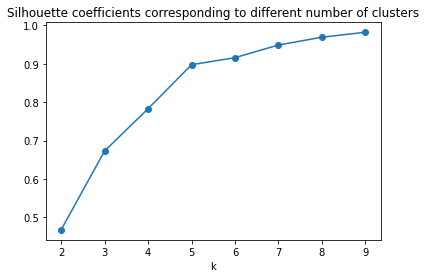

In [56]:
sil_score = []
for k in range(2,10):
  kmeans = KMeans(n_clusters=k, random_state=0).fit(df_features_arr)
  sil_score.append(silhouette_score(df_features_arr,kmeans.labels_))
plt.plot(range(2,10), sil_score, 'o-')
plt.title('Silhouette coefficients corresponding to different number of clusters')
plt.xlabel('k')
plt.show()

In [ ]:
k_means = KMeans(n_clusters=5, random_state=0)

k_means.fit(df_features_arr)

K = k_means.predict(df_features_arr)

In [ ]:
df_cluster = df.copy()
df_cluster['cluster_group'] = K

In [ ]:
df_cluster

,user_id,question_1_0,question_1_1,question_1_2,question_1_3,question_1_4,question_1_5,question_1_6,question_1_7,question_1_8,question_1_9,question_2_0,question_2_1,question_2_2,question_2_3,question_2_4,question_2_5,cancellation_date,cancellation_time,cluster_group
0,89534,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2022-09-15,11:24:14,1
1,108353,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2022-09-15,08:19:17,2
2,108240,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2022-09-14,22:40:07,1
3,122399,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2022-09-14,22:13:26,1
4,109172,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2022-09-14,19:34:57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9759,96043,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2019-05-17,16:38:39,2
9760,103297,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2019-05-17,13:05:31,1
9761,103920,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2019-05-17,12:20:55,2
9762,103848,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2019-05-17,08:46:43,0


In [ ]:
df_cluster0 = df_cluster[df_cluster['cluster_group'] == 0]
df_cluster1 = df_cluster[df_cluster['cluster_group'] == 1]
df_cluster2 = df_cluster[df_cluster['cluster_group'] == 2]
df_cluster3 = df_cluster[df_cluster['cluster_group'] == 3]
df_cluster4 = df_cluster[df_cluster['cluster_group'] == 4]

In [ ]:
df_cluster0

,user_id,question_1_0,question_1_1,question_1_2,question_1_3,question_1_4,question_1_5,question_1_6,question_1_7,question_1_8,question_1_9,question_2_0,question_2_1,question_2_2,question_2_3,question_2_4,question_2_5,cancellation_date,cancellation_time,cluster_group
4,109172,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2022-09-14,19:34:57,0
9,128432,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2022-09-14,08:41:29,0
16,116135,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2022-09-13,09:07:39,0
22,100184,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2022-09-12,22:13:12,0
26,132458,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2022-09-11,13:55:39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9754,103614,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2019-05-18,09:33:05,0
9755,89979,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2019-05-18,09:25:03,0
9756,99622,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2019-05-18,08:06:04,0
9758,103829,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2019-05-18,00:53:21,0


1_1:I don't drink enough for a coffee subscription service

2_0:0

In [ ]:
df_cluster1

,user_id,question_1_0,question_1_1,question_1_2,question_1_3,question_1_4,question_1_5,question_1_6,question_1_7,question_1_8,question_1_9,question_2_0,question_2_1,question_2_2,question_2_3,question_2_4,question_2_5,cancellation_date,cancellation_time,cluster_group
0,89534,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2022-09-15,11:24:14,1
2,108240,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2022-09-14,22:40:07,1
3,122399,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2022-09-14,22:13:26,1
7,112386,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2022-09-14,16:12:54,1
8,112616,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2022-09-14,15:36:57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9741,88818,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2019-05-18,22:44:47,1
9742,99631,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2019-05-18,21:18:26,1
9746,103851,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2019-05-18,16:09:57,1
9752,94172,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2019-05-18,13:23:21,1


1_7: But other coffee beans just aren't cutting it for me

2_0

In [ ]:
df_cluster2

,user_id,question_1_0,question_1_1,question_1_2,question_1_3,question_1_4,question_1_5,question_1_6,question_1_7,question_1_8,question_1_9,question_2_0,question_2_1,question_2_2,question_2_3,question_2_4,question_2_5,cancellation_date,cancellation_time,cluster_group
1,108353,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2022-09-15,08:19:17,2
5,114739,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2022-09-14,18:44:22,2
11,107727,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2022-09-14,07:17:20,2
28,118442,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2022-09-10,09:40:50,2
30,133669,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2022-09-09,18:36:04,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9743,100780,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2019-05-18,20:26:16,2
9744,103486,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2019-05-18,20:00:21,2
9757,101144,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2019-05-18,07:35:20,2
9759,96043,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2019-05-17,16:38:39,2


1_3:It's too expensive for me

2_0

In [ ]:
df_cluster3

,user_id,question_1_0,question_1_1,question_1_2,question_1_3,question_1_4,question_1_5,question_1_6,question_1_7,question_1_8,question_1_9,question_2_0,question_2_1,question_2_2,question_2_3,question_2_4,question_2_5,cancellation_date,cancellation_time,cluster_group
18,133515,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2022-09-13,08:29:59,3
25,132331,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,2022-09-11,20:39:13,3
38,132887,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2022-09-07,11:20:35,3
49,89617,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2022-09-06,08:56:06,3
63,103031,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2022-09-04,12:50:18,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9726,99964,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2019-05-21,00:04:14,3
9727,103863,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019-05-20,21:00:53,3
9730,94966,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,2019-05-20,15:20:04,3
9745,103845,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019-05-18,17:38:52,3


In [ ]:
df_cluster3.sum()

user_id                                                      120317488
question_1_0                                                        17
question_1_1                                                         0
question_1_2                                                         6
question_1_3                                                         0
question_1_4                                                         1
question_1_5                                                         1
question_1_6                                                         0
question_1_7                                                         0
question_1_8                                                      1031
question_1_9                                                         1
question_2_0                                                       120
question_2_1                                                         1
question_2_2                                                        19
questi

1_8: I would definitely buy your coffee beans when I am back in Singapore for a visit!

2_3: The coffee is too dark

2_5: didnt enjoy the experience


In [ ]:
df_cluster4

,user_id,question_1_0,question_1_1,question_1_2,question_1_3,question_1_4,question_1_5,question_1_6,question_1_7,question_1_8,question_1_9,question_2_0,question_2_1,question_2_2,question_2_3,question_2_4,question_2_5,cancellation_date,cancellation_time,cluster_group
6,121880,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2022-09-14,17:56:37,4
21,132330,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2022-09-12,23:29:35,4
50,86972,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2022-09-06,08:33:46,4
104,101450,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2022-08-26,09:58:56,4
124,92924,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2022-08-23,08:25:55,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9731,103541,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2019-05-20,13:27:30,4
9748,103936,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2019-05-18,14:45:36,4
9749,103789,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2019-05-18,14:16:30,4
9750,103717,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2019-05-18,13:48:51,4


1_6: didnt enjoy the whole experince

2_0:

## Review.csv

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/6206/raw_data/Review-2022-09-15.csv')
df1

,status,score,title,brewing_method,body,product_id,user_id,created
0,Requires Moderation,5,Fragrant,Drip,Its fragrant and easy to drink.,3757,133241,12-09-2022
1,Requires Moderation,5,Sweet,Drip,"Its light and sweet. When brewed properly, the...",5638,133241,12-09-2022
2,Requires Moderation,2,Never received it,Espresso,Not the hook fault if lost in mailing. But mor...,4043,133348,28-08-2022
3,Requires Moderation,5,1001251680072837,Espresso,Had it taken a lengthy waiting time for a loca...,5184,125168,25-08-2022
4,Requires Moderation,1,Coffee didn't make its way to us!,NaN,Hook Coffee is disappointing. This purchase ha...,4895,107372,23-08-2022
...,...,...,...,...,...,...,...,...
1280,Approved,3,NaN,NaN,NaN,3768,101586,16-05-2019
1281,Approved,5,NaN,NaN,NaN,3845,91259,16-05-2019
1282,Approved,5,NaN,NaN,NaN,3607,91180,16-05-2019
1283,Approved,5,NaN,NaN,NaN,3768,92428,16-05-2019


In [ ]:
df1.drop(columns = ['title','body'], inplace=True)

In [ ]:
df1.head()

,status,score,brewing_method,product_id,user_id,created
0,Requires Moderation,5,Drip,3757,133241,12-09-2022
1,Requires Moderation,5,Drip,5638,133241,12-09-2022
2,Requires Moderation,2,Espresso,4043,133348,28-08-2022
3,Requires Moderation,5,Espresso,5184,125168,25-08-2022
4,Requires Moderation,1,NaN,4895,107372,23-08-2022


In [ ]:
df1.isnull().sum()

status               0
score                0
brewing_method    1051
product_id           0
user_id              0
created              0
dtype: int64

In [ ]:
# 空值用什么来代替？

### 'status' means if you want to buy it once again(do you like it).
### 'score' indicates the score you rating for this purchase order. Take 'Requires Moderation' as 0, 'Approved' as 1, 'Rejected' as -1


In [ ]:
df1['status'].unique()

array(['Requires Moderation', 'Rejected', 'Approved'], dtype=object)

In [ ]:
for i in range(len(df1)):
  if df1['status'][i] == 'Approved':
    df1['status'][i] = 1
  elif df1['status'][i] == 'Requires Moderation':
    df1['status'][i] = 0
  else:
    df1['status'][i] = -1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df1

,status,score,brewing_method,product_id,user_id,created
0,0,5,Drip,3757,133241,12-09-2022
1,0,5,Drip,5638,133241,12-09-2022
2,0,2,Espresso,4043,133348,28-08-2022
3,0,5,Espresso,5184,125168,25-08-2022
4,0,1,NaN,4895,107372,23-08-2022
...,...,...,...,...,...,...
1280,1,3,NaN,3768,101586,16-05-2019
1281,1,5,NaN,3845,91259,16-05-2019
1282,1,5,NaN,3607,91180,16-05-2019
1283,1,5,NaN,3768,92428,16-05-2019


In [ ]:
created_month = []
for i in range(len(df1)):
  created_month.append(df1['created'][i][3:])
created_month

['09-2022',
 '09-2022',
 '08-2022',
 '08-2022',
 '08-2022',
 '08-2022',
 '08-2022',
 '08-2022',
 '08-2022',
 '07-2022',
 '07-2022',
 '07-2022',
 '06-2022',
 '05-2022',
 '05-2022',
 '05-2022',
 '04-2022',
 '03-2022',
 '03-2022',
 '03-2022',
 '03-2022',
 '03-2022',
 '02-2022',
 '01-2022',
 '01-2022',
 '01-2022',
 '12-2021',
 '12-2021',
 '12-2021',
 '10-2021',
 '10-2021',
 '10-2021',
 '10-2021',
 '10-2021',
 '10-2021',
 '10-2021',
 '09-2021',
 '09-2021',
 '09-2021',
 '09-2021',
 '08-2021',
 '08-2021',
 '08-2021',
 '07-2021',
 '07-2021',
 '07-2021',
 '07-2021',
 '07-2021',
 '07-2021',
 '07-2021',
 '05-2021',
 '05-2021',
 '05-2021',
 '05-2021',
 '05-2021',
 '05-2021',
 '05-2021',
 '04-2021',
 '04-2021',
 '04-2021',
 '04-2021',
 '04-2021',
 '04-2021',
 '03-2021',
 '03-2021',
 '03-2021',
 '03-2021',
 '03-2021',
 '03-2021',
 '03-2021',
 '03-2021',
 '03-2021',
 '03-2021',
 '03-2021',
 '02-2021',
 '02-2021',
 '02-2021',
 '02-2021',
 '02-2021',
 '02-2021',
 '02-2021',
 '01-2021',
 '01-2021',
 '01

In [ ]:
df1.insert(loc=6, column='created_month', value=created_month)
df1

,status,score,brewing_method,product_id,user_id,created,created_month
0,0,5,Drip,3757,133241,12-09-2022,09-2022
1,0,5,Drip,5638,133241,12-09-2022,09-2022
2,0,2,Espresso,4043,133348,28-08-2022,08-2022
3,0,5,Espresso,5184,125168,25-08-2022,08-2022
4,0,1,NaN,4895,107372,23-08-2022,08-2022
...,...,...,...,...,...,...,...
1280,1,3,NaN,3768,101586,16-05-2019,05-2019
1281,1,5,NaN,3845,91259,16-05-2019,05-2019
1282,1,5,NaN,3607,91180,16-05-2019,05-2019
1283,1,5,NaN,3768,92428,16-05-2019,05-2019


In [ ]:
df_agg = df1.groupby('created_month').agg({'status':'mean','score':'mean'})
df_agg

,status,score
created_month,,
01-2020,0.000000,1.000000
01-2021,-0.333333,3.111111
01-2022,0.666667,3.333333
02-2020,0.333333,3.666667
02-2021,-0.714286,4.571429
02-2022,-1.000000,1.000000
03-2020,0.000000,1.666667
03-2021,0.272727,3.909091
03-2022,0.000000,3.400000


In [ ]:
df_agg = pd.DataFrame(df_agg)

In [ ]:
df_agg = df_agg.reset_index()
df_agg

,created_month,status,score
0,01-2020,0.000000,1.000000
1,01-2021,-0.333333,3.111111
2,01-2022,0.666667,3.333333
3,02-2020,0.333333,3.666667
4,02-2021,-0.714286,4.571429
5,02-2022,-1.000000,1.000000
6,03-2020,0.000000,1.666667
7,03-2021,0.272727,3.909091
8,03-2022,0.000000,3.400000
9,04-2020,0.428571,4.000000


In [ ]:
df_agg['created_month'] = pd.to_datetime(df_agg['created_month'],format='%m-%Y')
df_agg

,created_month,status,score
0,2020-01-01,0.000000,1.000000
1,2021-01-01,-0.333333,3.111111
2,2022-01-01,0.666667,3.333333
3,2020-02-01,0.333333,3.666667
4,2021-02-01,-0.714286,4.571429
5,2022-02-01,-1.000000,1.000000
6,2020-03-01,0.000000,1.666667
7,2021-03-01,0.272727,3.909091
8,2022-03-01,0.000000,3.400000
9,2020-04-01,0.428571,4.000000


In [ ]:
df_agg.sort_values(by='created_month',ascending=False, inplace=True)

In [ ]:
df_agg

,created_month,status,score
30,2022-09-01,0.000000,5.000000
26,2022-08-01,0.000000,3.714286
22,2022-07-01,0.000000,4.666667
18,2022-06-01,0.000000,2.000000
15,2022-05-01,0.000000,3.666667
11,2022-04-01,0.000000,5.000000
8,2022-03-01,0.000000,3.400000
5,2022-02-01,-1.000000,1.000000
2,2022-01-01,0.666667,3.333333
38,2021-12-01,-0.333333,3.000000


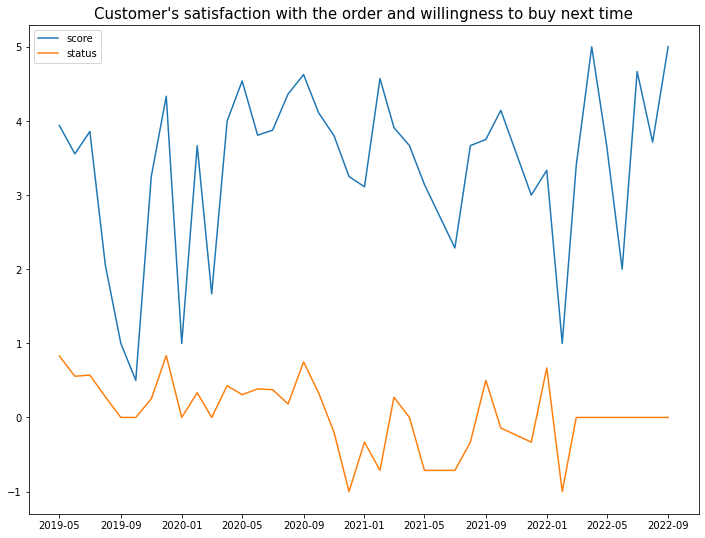

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(df_agg['created_month'], df_agg['score'], label='score')
plt.plot(df_agg['created_month'], df_agg['status'], label='status')
plt.legend()
plt.title("Customer's satisfaction with the order and willingness to buy next time", fontsize=15)
plt.show()
# plt.figure(figsize=(12,9))
# plt.xticks(rotation=45)
# plt.xlabel('Date', fontsize=15)
# plt.ylabel('Cases', fontsize=15)
# plt.title("the number of COVID-19 cases in Singapore from Dec. 27, 2021 to Mar. 20, 2022", fontsize=15)
# sns.lineplot(x='created',y='status',data=df_agg,legend='full')
# sns.lineplot(x='created',y='score',data=df_agg,legend='full')
# plt.legend()
# plt.grid()
# plt.show()